In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# 1. Data Loading and Exploration
# ------------------------------
print("Loading and exploring the Pima Indians Diabetes dataset...\n")

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

Loading and exploring the Pima Indians Diabetes dataset...



In [ ]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset shape: (768, 9)

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("\nDataset summary statistics:")
print(data.describe())


Dataset summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

In [ ]:
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for zero values that might represent missing data
print("\nNumber of zeros in each column (potential missing values):")
for column in data.columns:
    print(f"{column}: {(data[column] == 0).sum()}")


Number of zeros in each column (potential missing values):
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
# 2. Data Preprocessing
# --------------------
print("\n\nData Preprocessing...\n")

# Replace 0s with NaN for columns where 0 is not a valid value
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_processed = data.copy()
for column in columns_to_replace:
    data_processed[column] = data_processed[column].replace(0, np.nan)

print("Missing values after replacing zeros with NaN:")
print(data_processed.isnull().sum())



Data Preprocessing...

Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Fill missing values with median
for column in columns_to_replace:
    median_value = data_processed[column].median()
    data_processed[column].fillna(median_value, inplace=True)

print("\nMissing values after imputation:")
print(data_processed.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64




Exploratory Data Analysis...



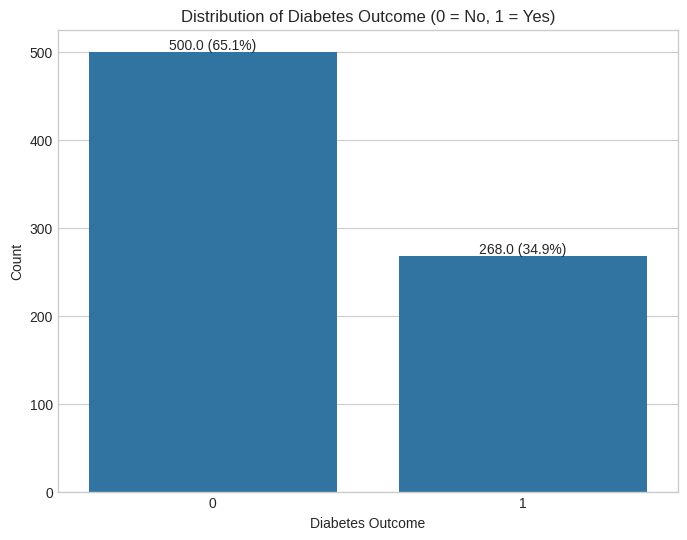

In [ ]:
# 3. Exploratory Data Analysis
# ---------------------------
print("\n\nExploratory Data Analysis...\n")

# Set up plot style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(8, 6))

# Plot the distribution of outcomes
ax = sns.countplot(x='Outcome', data=data_processed)
plt.title('Distribution of Diabetes Outcome (0 = No, 1 = Yes)')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
# Add count and percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            f'{height} ({height/len(data_processed)*100:.1f}%)',
            ha="center")

plt.show()

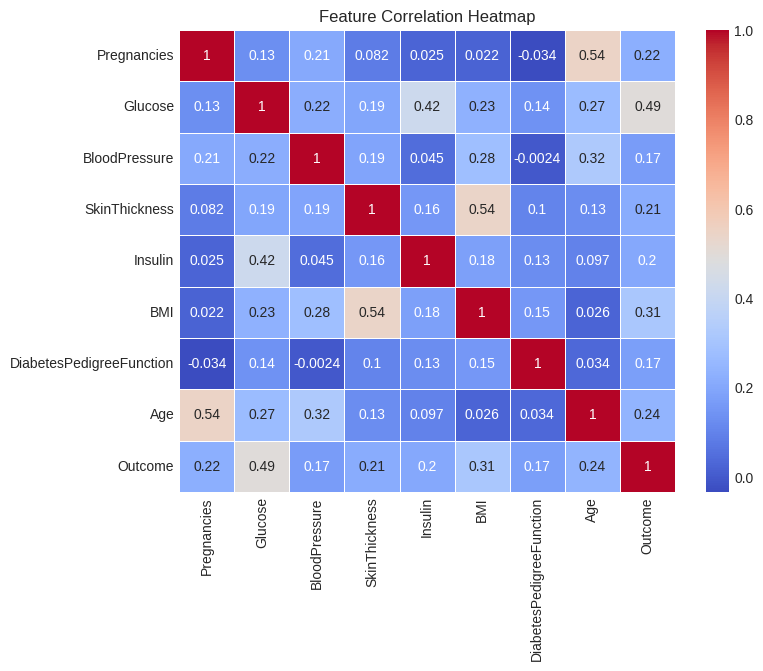

In [ ]:
# Feature correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

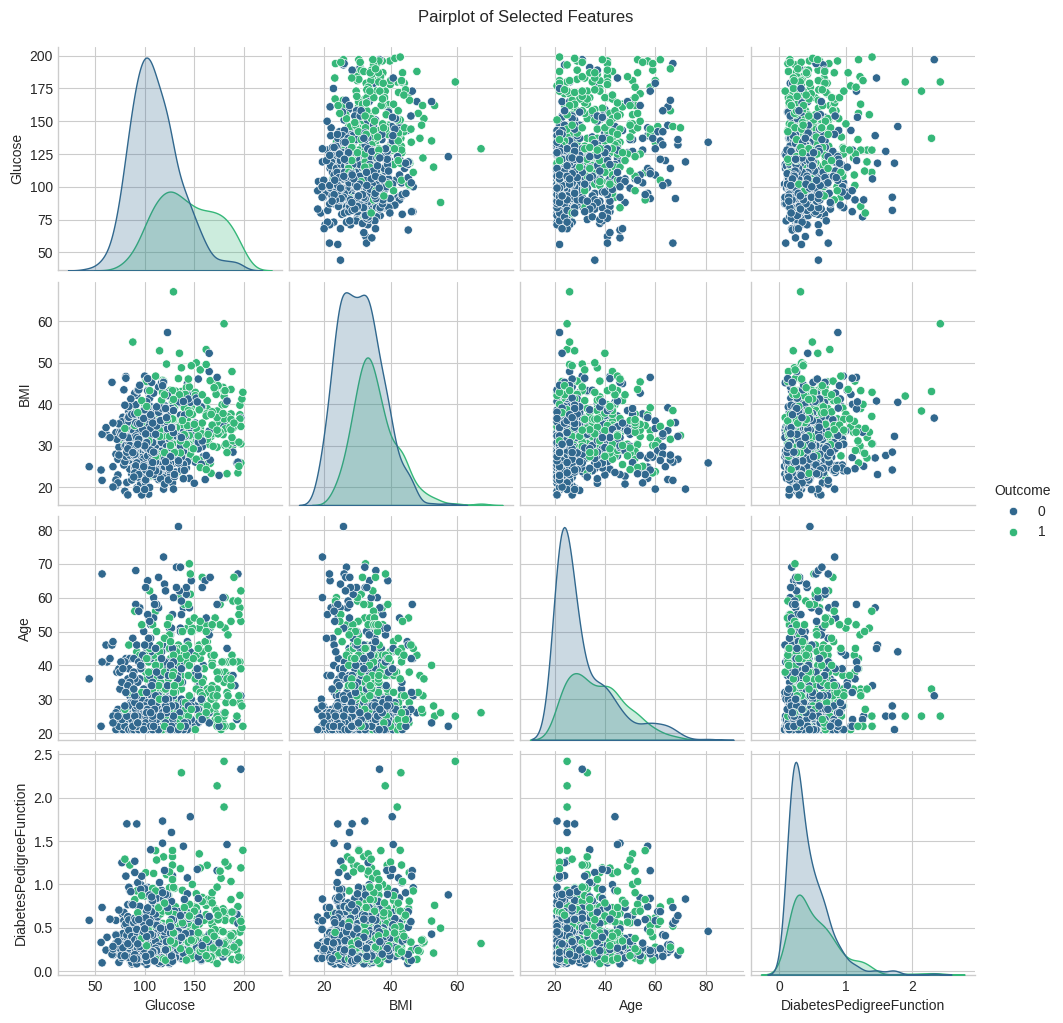

In [ ]:
# Pairplot for selected features
selected_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(data_processed[selected_features], hue='Outcome', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

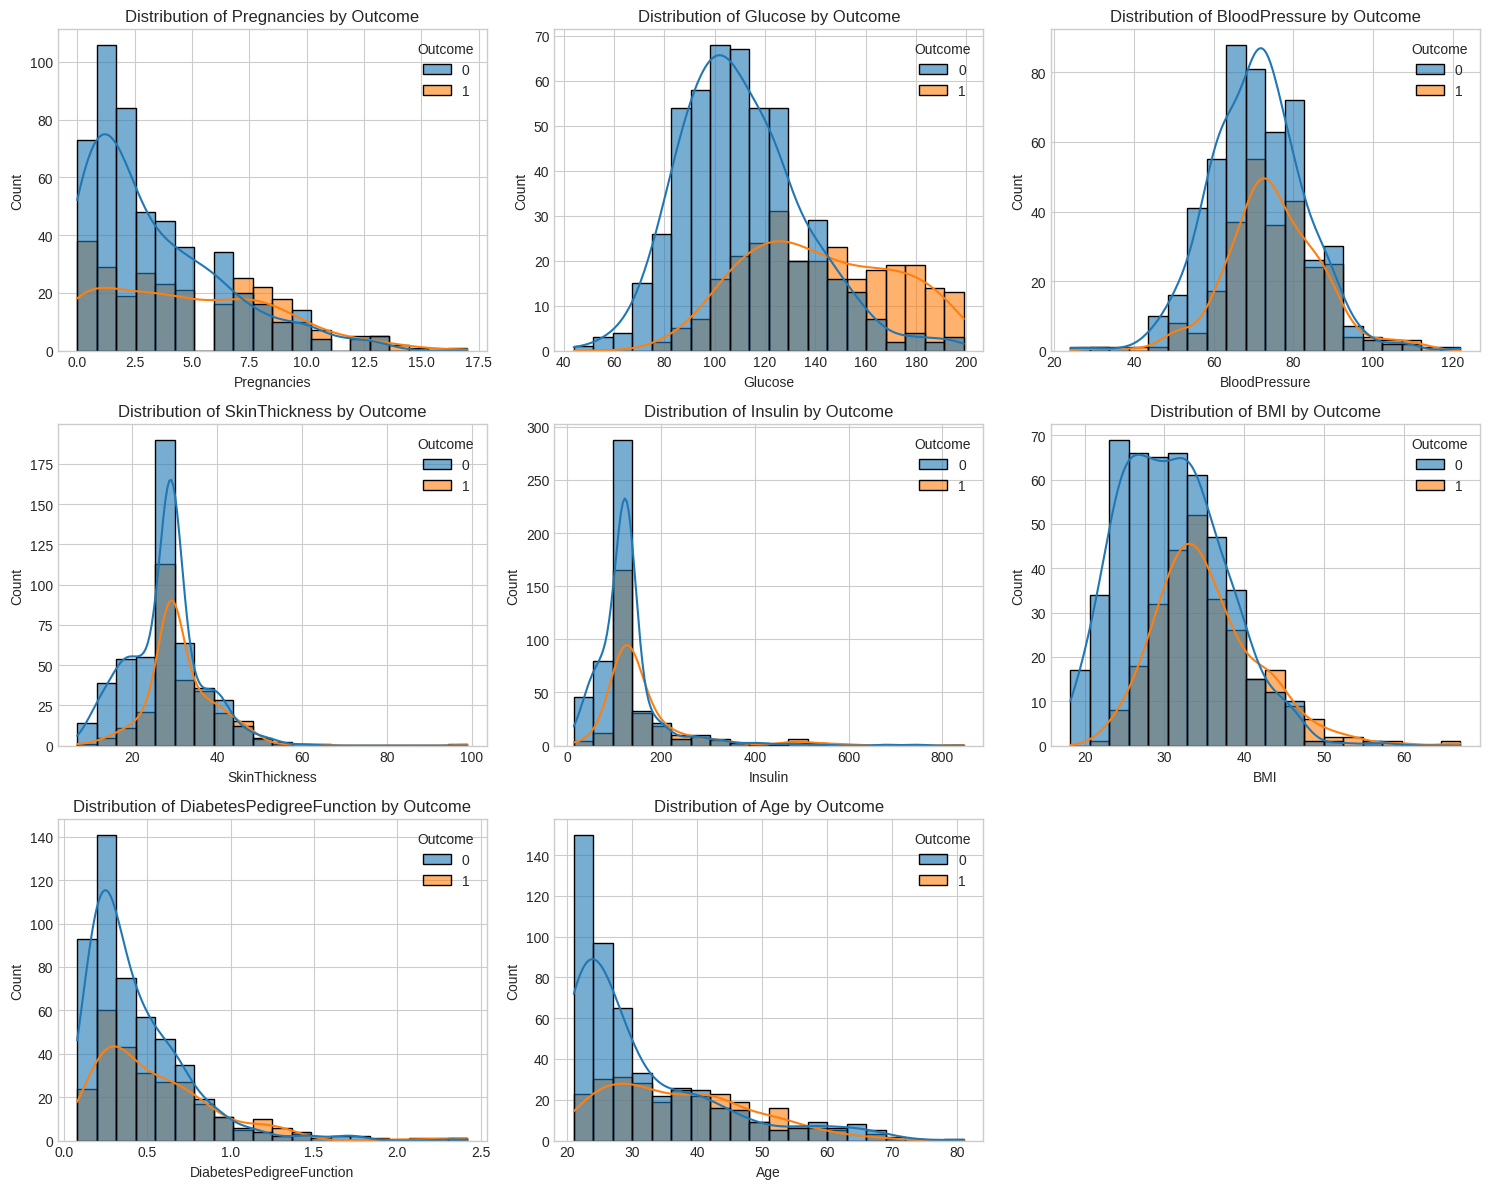

In [ ]:
# Distribution of features by diabetes outcome
plt.figure(figsize=(15, 12))
for i, feature in enumerate(data_processed.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data_processed, x=feature, hue='Outcome', kde=True, bins=20, alpha=0.6)
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Feature Selection and Data Splitting
# -------------------------------------
print("\n\nFeature Selection and Data Splitting...\n")

# Separate features and target variable
X = data_processed.drop('Outcome', axis=1)
y = data_processed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set outcome distribution: \n{y_train.value_counts(normalize=True)}")
print(f"Testing set outcome distribution: \n{y_test.value_counts(normalize=True)}")



Feature Selection and Data Splitting...

Training set shape: (576, 8)
Testing set shape: (192, 8)
Training set outcome distribution: 
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Testing set outcome distribution: 
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


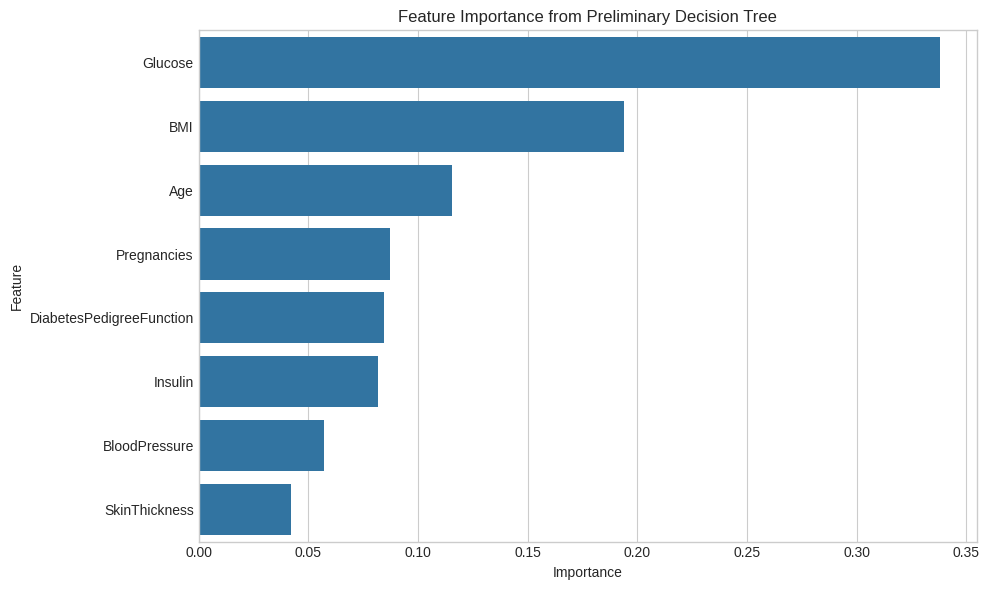


Feature importance from preliminary tree:
                    Feature  Importance
1                   Glucose    0.337990
5                       BMI    0.193814
7                       Age    0.115501
0               Pregnancies    0.087227
6  DiabetesPedigreeFunction    0.084515
4                   Insulin    0.081957
2             BloodPressure    0.057052
3             SkinThickness    0.041943


In [ ]:
# Feature importance using a preliminary decision tree
preliminary_tree = DecisionTreeClassifier(random_state=42)
preliminary_tree.fit(X_train, y_train)

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': preliminary_tree.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Preliminary Decision Tree')
plt.tight_layout()
plt.show()
print("\nFeature importance from preliminary tree:")
print(feature_importance)

In [ ]:
# 5. Decision Tree Model Building and Training
# -----------------------------------------
print("\n\nBuilding and Training Decision Tree Models...\n")



Building and Training Decision Tree Models...



In [ ]:
# Define preprocessing and model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__max_depth': [3, 4, 5, 6, 7, 8, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 126 candidates, totalling 630 fits

Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best cross-validation score: 0.7431


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# 6. Model Evaluation
# -----------------
print("\n\nModel Evaluation...\n")

# Make predictions on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation...

Test set accuracy: 0.7083

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       125
           1       0.61      0.46      0.53        67

    accuracy                           0.71       192
   macro avg       0.68      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



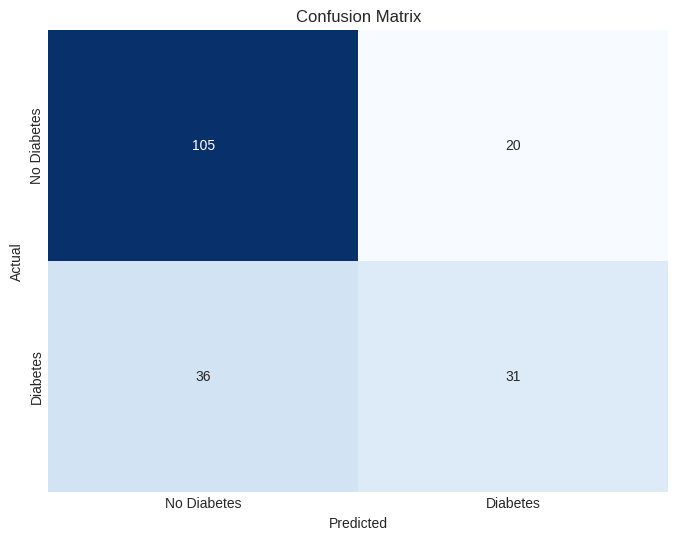

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

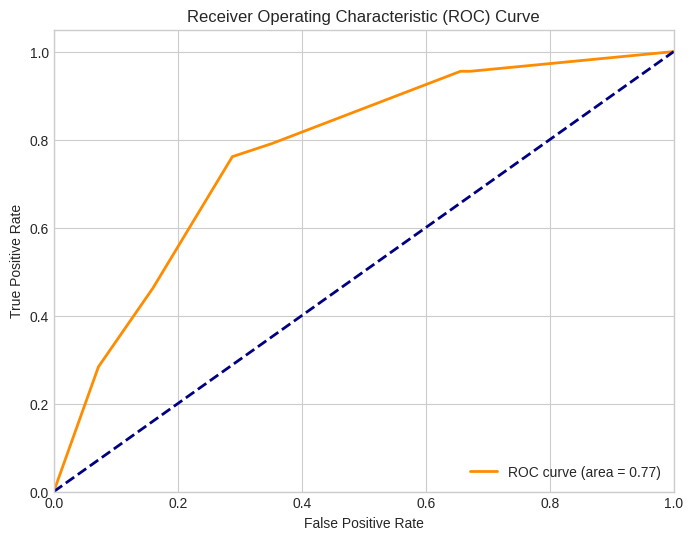

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Cross-validation evaluation
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print(f"\n10-fold Cross-Validation Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


10-fold Cross-Validation Score: 0.7369 ± 0.0378




Decision Tree Visualization...



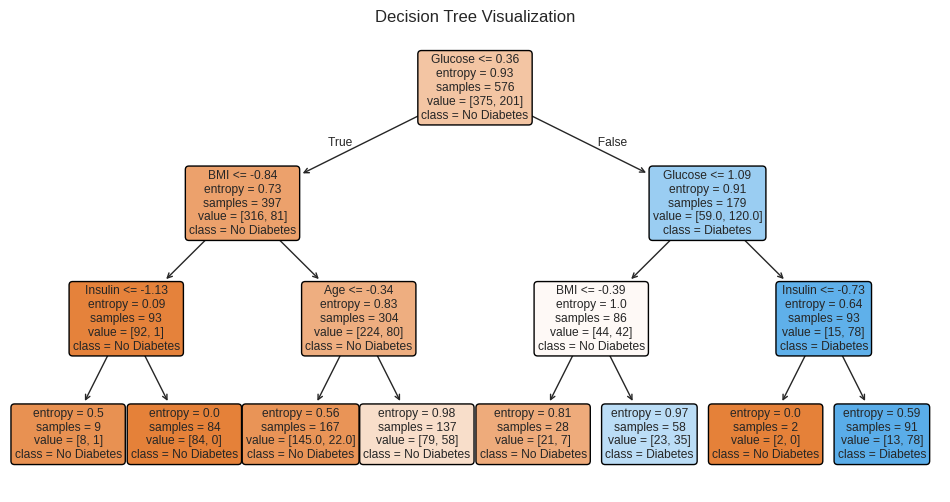

In [ ]:
# 7. Decision Tree Visualization
# ---------------------------
print("\n\nDecision Tree Visualization...\n")

# Extract the actual decision tree from the pipeline
dt_classifier = best_model.named_steps['model']

# Get feature names after preprocessing
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dt_classifier,
          feature_names=feature_names,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          proportion=False,
          precision=2)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
# Text representation of the tree
tree_text = export_text(dt_classifier, feature_names=feature_names)
print("\nText representation of the decision tree:")
print(tree_text)


Text representation of the decision tree:
|--- Glucose <= 0.36
|   |--- BMI <= -0.84
|   |   |--- Insulin <= -1.13
|   |   |   |--- class: 0
|   |   |--- Insulin >  -1.13
|   |   |   |--- class: 0
|   |--- BMI >  -0.84
|   |   |--- Age <= -0.34
|   |   |   |--- class: 0
|   |   |--- Age >  -0.34
|   |   |   |--- class: 0
|--- Glucose >  0.36
|   |--- Glucose <= 1.09
|   |   |--- BMI <= -0.39
|   |   |   |--- class: 0
|   |   |--- BMI >  -0.39
|   |   |   |--- class: 1
|   |--- Glucose >  1.09
|   |   |--- Insulin <= -0.73
|   |   |   |--- class: 0
|   |   |--- Insulin >  -0.73
|   |   |   |--- class: 1





Feature Importance Analysis...



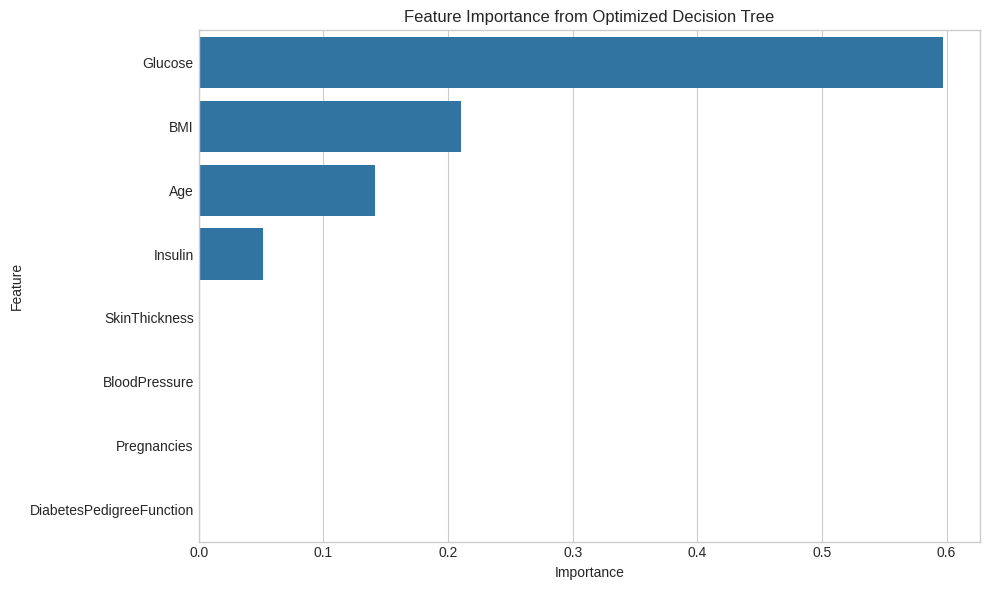

In [ ]:
# 8. Feature Importance Analysis
# ---------------------------
print("\n\nFeature Importance Analysis...\n")

# Get feature importance from the best model
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Optimized Decision Tree')
plt.tight_layout()
plt.show()

In [ ]:
print("Feature importance from optimized model:")
print(feature_importance)

Feature importance from optimized model:
                    Feature  Importance
1                   Glucose    0.596948
5                       BMI    0.210248
7                       Age    0.141073
4                   Insulin    0.051731
3             SkinThickness    0.000000
2             BloodPressure    0.000000
0               Pregnancies    0.000000
6  DiabetesPedigreeFunction    0.000000


In [ ]:
# 9. Summary and Conclusions
# -----------------------
print("\n\nSummary and Conclusions\n")

print("Model Performance Summary:")
print(f"- Best Model Parameters: {grid_search.best_params_}")
print(f"- Test Accuracy: {accuracy:.4f}")
print(f"- Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Summary and Conclusions

Model Performance Summary:
- Best Model Parameters: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
- Test Accuracy: 0.7083
- Cross-Validation Accuracy: 0.7369 ± 0.0378


In [ ]:
# Calculate most important features
top_features = feature_importance.head(3)['Feature'].tolist()
print(f"\nTop 3 most important features for diabetes prediction:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")


Top 3 most important features for diabetes prediction:
1. Glucose
2. BMI
3. Age
